 # RiceLeaf disease detection

 # Business case study

---



# Brown spot leaf
- 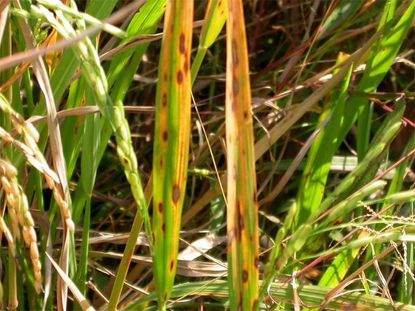
- a fungal disease caused by Cochliobolus miyabeanus that can affect the leaves, stems, seeds, and other parts of rice plants
- Brown leaf spot of rice can develop in areas with high relative humidity and temperatures between 16–36°C. It can also occur in soils that are nutrient-deficient, unflooded, or have accumulated toxic substances

# Bacterial leaf blight
- 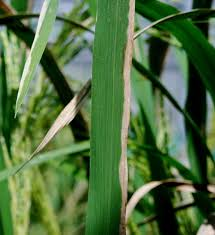
- Bacterial leaf blight (BLB) of rice is a bacterial disease caused by the pathogen Xanthomonas oryzae pv. oryzae (Xoo)
- It's one of the most serious diseases that affect rice, and can cause significant yield losses
- The disease spreads through irrigation water, rain, plant-to-plant contact, and tools used for transplanting seedlings
- Symptoms
 - Water-soaked or yellowish stripes on the leaf blades
 - Leaves that curl and dry out from the tips
 - Bacterial ooze that looks like a dewdrop on young lesions
 - Severely infected leaves that dry out quickly

# leaf smut
- 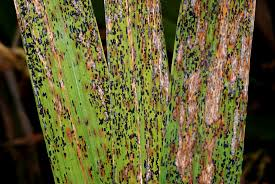
- Leaf smut of rice is a fungal disease that causes small, raised, black spots to appear on rice leaves
- Symptoms :
 - The spots are usually 0.5 to 5.0 millimeters long and 0.5 to 1.5 millimeters wide. They appear on both sides of the leaves, and are most common on the oldest leaves. When wet, the spots break open and release black spores. Heavily infected leaves may turn yellow, and the tips may die and turn gray

In [ ]:
pip install keras

In [ ]:
pip install tensorflow

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
# import library
import tensorflow as tf
import os
import shutil
import random
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
source_dir = '/content/drive/MyDrive/rice crop/PRCP-1001-RiceLeaf/image folder'  # Original data with class folders
target_dir = './split_data'  # New directory for train/validation/test splits


In [ ]:
# Split ratios
train_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15

# Create train, validation, and test folders
for split in ['train', 'validation', 'test']:
    for class_name in os.listdir(source_dir):
        os.makedirs(os.path.join(target_dir, split, class_name), exist_ok=True)

# Split the data
for class_name in os.listdir(source_dir):
    class_path = os.path.join(source_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    print(f"Processing class: {class_name}")  # Debugging: List all classes being processed

    # Get all file names for the current class
    filenames = [f for f in os.listdir(class_path) if not f.startswith('.')]  # Exclude hidden files
    random.shuffle(filenames)  # Shuffle to ensure randomness

    # Determine split indices
    total = len(filenames)
    train_end = int(train_ratio * total)
    valid_end = train_end + int(validation_ratio * total)

    # Assign files to each split
    train_files = filenames[:train_end]
    valid_files = filenames[train_end:valid_end]
    test_files = filenames[valid_end:]

    # Print stats for the class
    print(f"Class '{class_name}': {total} total images")
    print(f"Train: {len(train_files)}, Validation: {len(valid_files)}, Test: {len(test_files)}")

    # Copy files to respective folders
    for file_list, split in zip([train_files, valid_files, test_files], ['train', 'validation', 'test']):
        for file in file_list:
            src_path = os.path.join(class_path, file)
            dst_path = os.path.join(target_dir, split, class_name, file)
            shutil.copy(src_path, dst_path)

print("Data successfully split into train, validation, and test sets!")

Processing class: Bacterial leaf blight
Class 'Bacterial leaf blight': 40 total images
Train: 28, Validation: 6, Test: 6
Processing class: Brown spot
Class 'Brown spot': 40 total images
Train: 28, Validation: 6, Test: 6
Processing class: Leaf smut
Class 'Leaf smut': 39 total images
Train: 27, Validation: 5, Test: 7
Data successfully split into train, validation, and test sets!


In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dir = 'split_data/train'
validation_dir = 'split_data/validation'


# Generating batches of image data
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale= (1./255),
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=(1./255))

train= image_dataset_from_directory(
    train_dir,
    image_size=(150, 150),
    batch_size=32,
    color_mode='rgb',
    label_mode='categorical'

)

validation= image_dataset_from_directory(
    validation_dir,
    image_size=(150,150),
    batch_size=32,
    color_mode='rgb',
    label_mode='categorical'
)


# Optional: Class names from the dataset
class_names = train.class_names
print("Class names:", class_names)


Found 114 files belonging to 3 classes.
Found 42 files belonging to 3 classes.
Class names: ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']


# image visualization

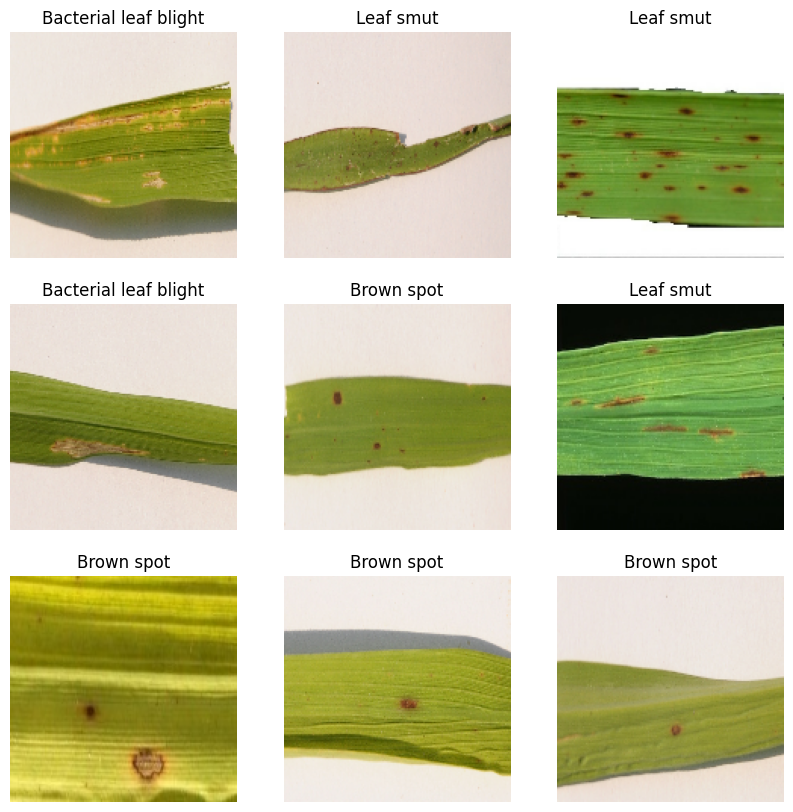

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Create an iterator from the dataset
train_iterator = iter(train)

# Get the next batch of data
images, labels = next(train_iterator)

# Get class names (assuming they are available from 'train.class_names')
class_names = train.class_names

# Display the first 9 images with labels
plt.figure(figsize=(10,10))
for i in range(min(9, images.shape[0])):
    ax = plt.subplot(3,3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))  # Convert to uint8 for display

    # Get predicted class index
    predicted_class_index = np.argmax(labels[i])

    # Get class name using the index
    predicted_class_name = class_names[predicted_class_index]

    plt.title(predicted_class_name)
    plt.axis("off")

plt.show()

In [ ]:
# scaling of data
train= train.map(lambda x, y: (x / 255.0, y))
validation= validation.map(lambda x, y: (x / 255.0, y))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',padding='same', input_shape=(150,150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3),padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3),padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3),padding='same',activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Add dropout for regularization
model.add(Dense(3, activation='softmax'))  # num_classes = number of output classes

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 20736)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       2,654,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,043,139 (11.61 MB)

 Trainable params: 3,043,139 (11.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5.keras', verbose=1, save_best_only=True)

# Use the data generators and correct validation data
hist = model.fit(train, epochs=40, validation_data=validation, callbacks=[checkpointer],
          verbose=1, shuffle=True)

Epoch 1/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3163 - loss: 1.5468
Epoch 1: val_loss improved from inf to 1.10887, saving model to model.weights.best.hdf5.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.3145 - loss: 1.5475 - val_accuracy: 0.4286 - val_loss: 1.1089
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3650 - loss: 1.1159
Epoch 2: val_loss improved from 1.10887 to 1.10006, saving model to model.weights.best.hdf5.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.3569 - loss: 1.1152 - val_accuracy: 0.2381 - val_loss: 1.1001
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4468 - loss: 1.0843
Epoch 3: val_loss improved from 1.10006 to 1.08022, saving model to model.weights.best.hdf5.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.4399 - loss: 1.0844 - val_accuracy: 0.4286 - val_loss: 1.0802
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4408 - loss: 1.0774
Epoch 4: val_loss improved from 1.08022 to 1.05

In [ ]:
model.load_weights('model.weights.best.hdf5.keras')

In [ ]:
model

<Sequential name=sequential_2, built=True>

In [ ]:
test_dir='split_data/test'
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=(1./255))

test= image_dataset_from_directory(
    test_dir,
    image_size=(150,150),
    batch_size=32,
    color_mode='rgb',
    label_mode='categorical'
)

Found 46 files belonging to 3 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 701ms/step


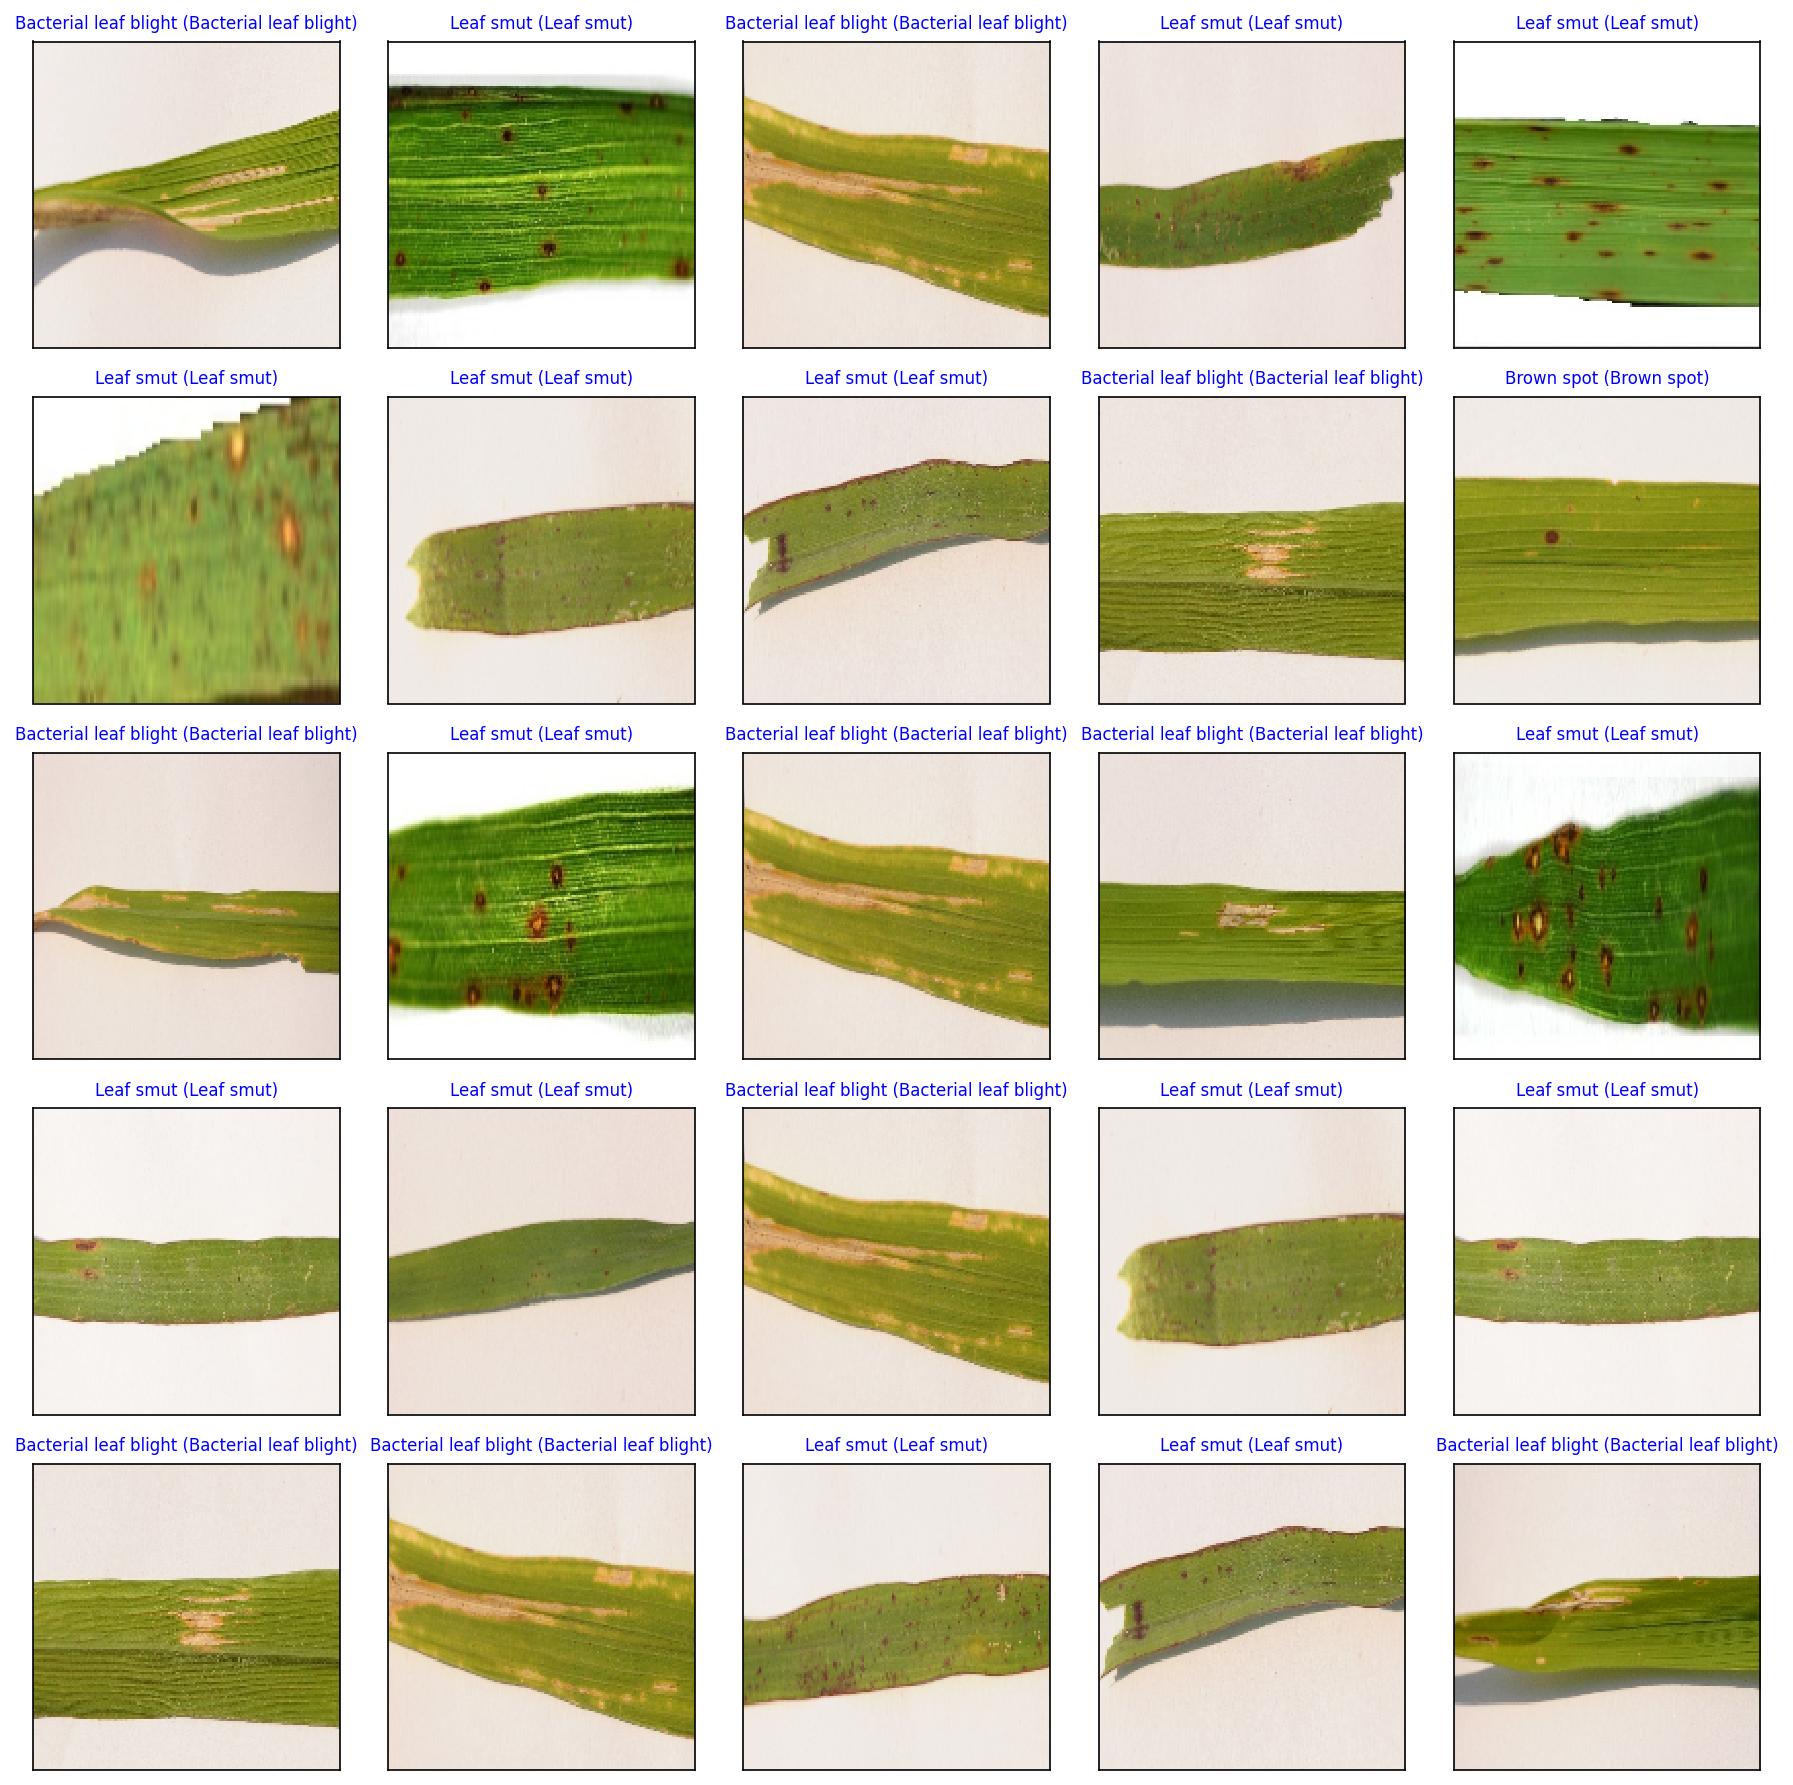

In [ ]:
for images, labels in test.take(1):
    y_pred = model.predict(images)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(labels.numpy(), axis=1)

    # Plot 25 random images from the batch
    fig = plt.figure(figsize=(12, 12), dpi=150)
    for i, idx in enumerate(np.random.choice(len(images), size=25, replace=True)):
        ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])

        # Process the image
        image = images[idx].numpy()  # Convert to NumPy
        if image.max() <= 1.0:  # Check if the image is normalized
            image = (image * 255).astype('uint8')  # Scale to 0-255
        else:
            image = image.astype('uint8')  # Cast to uint8

        # Ensure dimensions are correct
        if image.shape[-1] != 3:  # Ensure RGB format
            image = np.stack([image.squeeze()] * 3, axis=-1)  # Convert grayscale to RGB

        ax.imshow(image, interpolation='nearest')  # Display the image

        # Get the predicted and true labels
        pred_label = class_names[y_pred_classes[idx]]
        true_label = class_names[y_true[idx]]

        # Set the title with color indicating correct or incorrect prediction
        ax.set_title(f"{pred_label} ({true_label})",
                     color=("blue" if pred_label == true_label else "red"),
                     fontsize=8)

    plt.tight_layout()
    plt.show()


In [ ]:
import tensorflow as tf

# Evaluate the model
test_loss, test_acc = model.evaluate(test)  # Remove steps argument
print('Test accuracy:', test_acc)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 247ms/step - accuracy: 0.9502 - loss: 14.1961
Test accuracy: 0.95652174949646


CNN model gives as 95.65% accuracy which is good

In [1]:
!pip install split-folders==0.5.1  # Install splitfolders

In [41]:
import splitfolders
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [32]:
# Split the image folder
input_folder = "/content/drive/MyDrive/rice crop/PRCP-1001-RiceLeaf/image folder"  # Replace with your folder path
output_folder = "output_folder"  # Choose an output folder name
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.8, 0.2))

Copying files: 119 files [00:00, 143.33 files/s]


In [33]:
# Data preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values
test_datagen = ImageDataGenerator(rescale=1./255)

img_width, img_height = 150, 150  # Set desired image dimensions
batch_size = 32

train_generator = train_datagen.flow_from_directory(
    os.path.join(output_folder, 'train'),
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    os.path.join(output_folder, 'val'),
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical')

Found 119 images belonging to 3 classes.
Found 48 images belonging to 3 classes.


In [34]:
# Extract data for kNN
X_train, y_train = [], []
for i in range(len(train_generator)):
    batch_x, batch_y = train_generator[i]
    X_train.extend(batch_x.reshape(batch_x.shape[0], -1))  # Flatten images
    y_train.extend(batch_y)

X_train = np.array(X_train)
y_train = np.array(y_train)

X_test, y_test = [], []
for i in range(len(test_generator)):
    batch_x, batch_y = test_generator[i]
    X_test.extend(batch_x.reshape(batch_x.shape[0], -1))  # Flatten images
    y_test.extend(batch_y)

X_test = np.array(X_test)
y_test = np.array(y_test)

In [35]:
X_train

array([[1.        , 1.        , 1.        , ..., 1.        , 0.9960785 ,
        0.98823535],
       [0.93725497, 0.8980393 , 0.89019614, ..., 0.9333334 , 0.89019614,
        0.86666673],
       [0.95294124, 0.9215687 , 0.91372555, ..., 0.9450981 , 0.9176471 ,
        0.8941177 ],
       ...,
       [0.9490197 , 0.909804  , 0.90196085, ..., 0.9333334 , 0.90196085,
        0.89019614],
       [0.8980393 , 0.83921576, 0.8196079 , ..., 0.9294118 , 0.86666673,
        0.86666673],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]], dtype=float32)

# KNN model

---



In [36]:
error_rate = []

for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


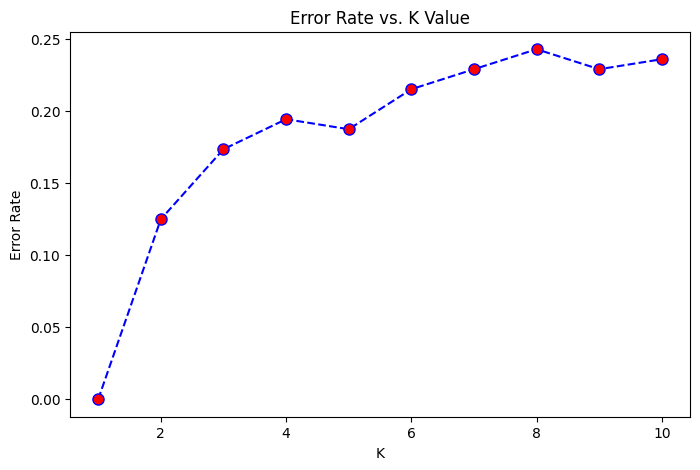

In [37]:
# plot error rate vs k value
plt.figure(figsize=(8,5))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [38]:
# Train the kNN model
knn = KNeighborsClassifier(n_neighbors=5)  # Create kNN classifier
knn.fit(X_train, np.argmax(y_train, axis=1))  # Train the model

KNeighborsClassifier()

# Evaluate the knn model

In [39]:
 from sklearn.metrics import accuracy_score,confusion_matrix
y_pred = knn.predict(X_test)
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7083333333333334


we achived 70.83% accuracy from KNN model.


In [40]:
matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
print(matrix)

[[12  0  4]
 [ 1 13  2]
 [ 3  4  9]]


In [42]:
print(classification_report(np.argmax(y_test, axis=1), y_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        16
           1       0.76      0.81      0.79        16
           2       0.60      0.56      0.58        16

    accuracy                           0.71        48
   macro avg       0.70      0.71      0.71        48
weighted avg       0.70      0.71      0.71        48



# Support vector machine learning model

---



In [43]:
svm = SVC()
svm.fit(X_train, np.argmax(y_train, axis=1))

SVC()

# Evaluate the SVM model

In [52]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred = svm.predict(X_test)
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7708333333333334


In [53]:
print(confusion_matrix(np.argmax(y_test, axis=1), y_pred))

[[13  0  3]
 [ 1 12  3]
 [ 2  2 12]]


In [54]:
print(classification_report(np.argmax(y_test, axis=1), y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        16
           1       0.86      0.75      0.80        16
           2       0.67      0.75      0.71        16

    accuracy                           0.77        48
   macro avg       0.78      0.77      0.77        48
weighted avg       0.78      0.77      0.77        48



From Support vector machine learning we achived 77% accuracy  

# Hyperparameter tunning of support vector machine learning model

In [57]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [58]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.001, 0.01, 0.1, 1]
}

# Create an SVM model
model = SVC()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Convert y_train to a 1D array by selecting the index of the maximum value in each row
y_train_1d = np.argmax(y_train, axis=1)

# Fit the GridSearchCV object to the training data using the 1D target variable
grid_search.fit(X_train, y_train_1d)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Convert y_test to a 1D array for evaluation
y_test_1d = np.argmax(y_test, axis=1)


# Evaluate the model
accuracy = accuracy_score(y_test_1d, y_pred)
print("Accuracy:", accuracy)

Best parameters: {'C': 0.1, 'gamma': 0.001, 'kernel': 'poly'}
Accuracy: 1.0


from hyperparameter tunning we get best parameter for support machine learning model is {'C':0.1,'gamma':0.001,'kernel:'poly'}

In [60]:
svc=SVC(C=0.1,gamma=0.001,kernel='poly')

In [61]:
svc.fit(X_train,np.argmax(y_train,axis=1))

SVC(C=0.1, gamma=0.001, kernel='poly')

In [63]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred = svc.predict(X_test)
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [64]:
print(confusion_matrix(np.argmax(y_test, axis=1), y_pred))

[[16  0  0]
 [ 0 16  0]
 [ 0  0 16]]


In [65]:
print(classification_report(np.argmax(y_test, axis=1), y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        16

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



hypertunned Support vector machine learning gives as 100 % accuracy

# challenges

---



- resizing the traning data , testing data and valdation data of all KNN, CNN and SVM model
- selecting parameters and models suitable for the given data


# RiceLeaf Disease Detection Project Report

---



1. Introduction

This report presents a summary of the RiceLeaf disease detection project, focusing on the challenges encountered and proposed solutions. The project aims to develop a machine learning-based system for early and accurate detection of Brown spot disease ,Bacterial leaf blight disease and leaf smut disease in rice leaves.

2. Project Objectives

Develop a machine learning model capable of accurately identifying Brown spot disease ,Bacterial leaf blight disease and leaf smut disease in rice leaves.
Explore the use of a business case study approach to demonstrate the practical application of the system.
Identify and address the challenges associated with data collection, model training, deployment, and integration.
3. Methodology

The project will involve the following steps:

- Data Collection and Preprocessing: Gather a dataset of labeled images of rice leaves affected by Brown spot disease and healthy leaves. Preprocess the data to enhance image quality and prepare it for model training.
- Model Selection and Training: Select an appropriate machine learning model architecture, such as a Convolutional Neural Network (CNN),K Nearest Neighbors (KNN) and support vector machine(SVM). Train the model using the preprocessed dataset, optimizing hyperparameters for optimal performance.
- Model Evaluation and Validation: Evaluate the trained model's accuracy and generalization ability using a separate validation dataset. Fine-tune the model to improve performance if necessary.
- Deployment and Integration: Deploy the model in a user-friendly platform, such as a mobile application or web interface. Integrate the system with existing agricultural systems for practical use by farmers or experts.

4. Conclusion

we trained CNN ,KNN and SVM model. from CNN model we achived 95.65% accuracy from knn model we can achive only 71% accuracy and from support vector machine we achived 71% accuracy but after huperparameter tunning of svm we achived 100 % accuracy and precision, recall scores also 100% which is really good . hence Support Vector Machine learning model with parameter (C=0.1,gamma=0.001,kernel='poly') is the best fitting model for these data set

**best fitting model is svm with parameter  (C=0.1,gamma=0.001,kernel='poly')**

5. Potential Uses

- Early Disease Detection: The primary use of your model would be to detect brown spot disease ,leaf smut and Bacterial leaf blight disease in rice plants at an early stage. Early detection is crucial for timely intervention and preventing widespread crop damage

